Accuracy: 0.794180269694819

Classification Report: 
               precision    recall  f1-score   support

       False       0.84      0.89      0.86      1035
        True       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



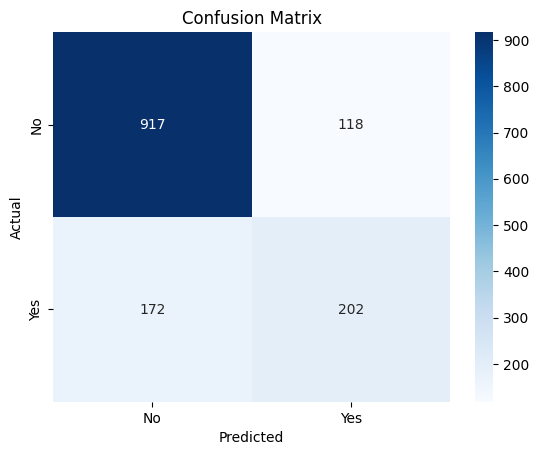

In [ ]:
import pandas as pd
df= pd.read_csv("../data/raw/telco_churn.csv")
df.head()
df.shape
df.columns
df.info()
df.describe()
df.isnull().sum()
df.columns = df.columns.str.strip()
df=df.dropna()
df.info()
df.head()
df['TotalCharges'].head(10)
df['TotalCharges'].dtype
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()
df=df.dropna(subset=['TotalCharges'])
df['TotalCharges'].dtype
df.info()
df.describe()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 50)
df.info()
df.isnull().sum()
df['Churn'].value_counts()
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of tenure (how long customers stay)
sns.histplot(df['tenure'], bins=30, kde=True)
plt.show()

# Distribution of MonthlyCharges
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.show()
# Churn rate
df['Churn'].value_counts(normalize=True)

# Average monthly charges for churned vs not
df.groupby('Churn')['MonthlyCharges'].mean()

# Average tenure for churned vs not
df.groupby('Churn')['tenure'].mean()
# Churn rate by contract type
sns.countplot(data=df, x='Contract', hue='Churn')
plt.show()

# Churn rate by internet service
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.show()




df_ml=df.copy()
#Drop cutomerID
df_ml=df_ml.drop('customerID',axis=1)
#convert categorical columns into dummy variables
df_ml=pd.get_dummies(df_ml, drop_first=True)
df_ml.head()

#Prediction
x = df_ml.drop('Churn_Yes', axis=1)
y = df_ml['Churn_Yes']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

y_pred= model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
